# Imports

In [1]:
import numpy as np
from scipy.special import lpmv
import matplotlib.pyplot as plt
from atomview.atom_wavefunction import get_radial_part

# Radial Part

## n Sorted

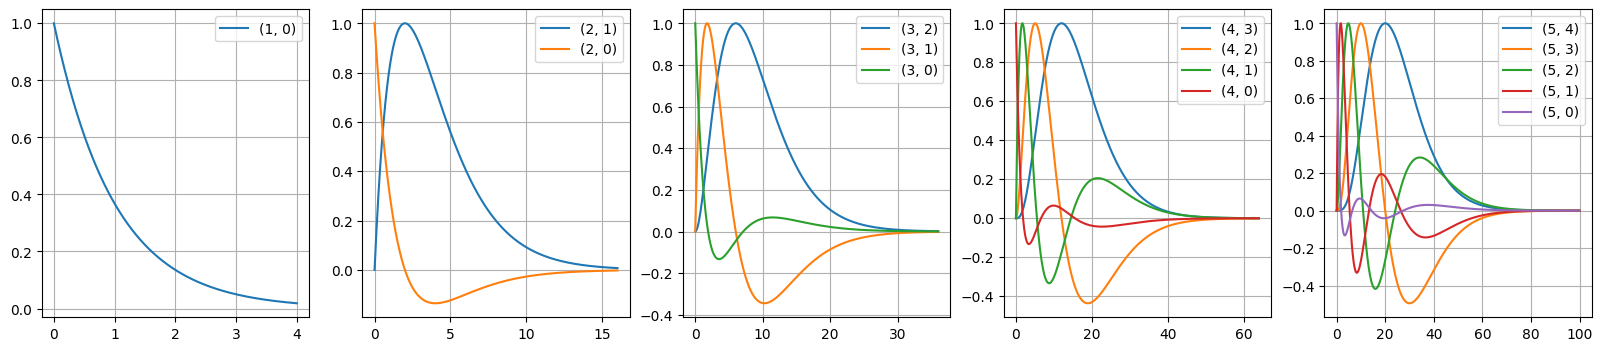

In [2]:
fig, axes = plt.subplots(1, 5, figsize=(5*4, 4))

for n in range(1, 5+1):
    ax = axes[n-1]
    r = np.linspace(0, (2*n)**2, 1000)
    for l in range(n-1, -1, -1):
        R = get_radial_part(n, l, r)
        ax.plot(r, R/max(R), label=f'({n}, {l})')
        ax.legend()
        ax.grid(True)

plt.show()

## Diff Sorted

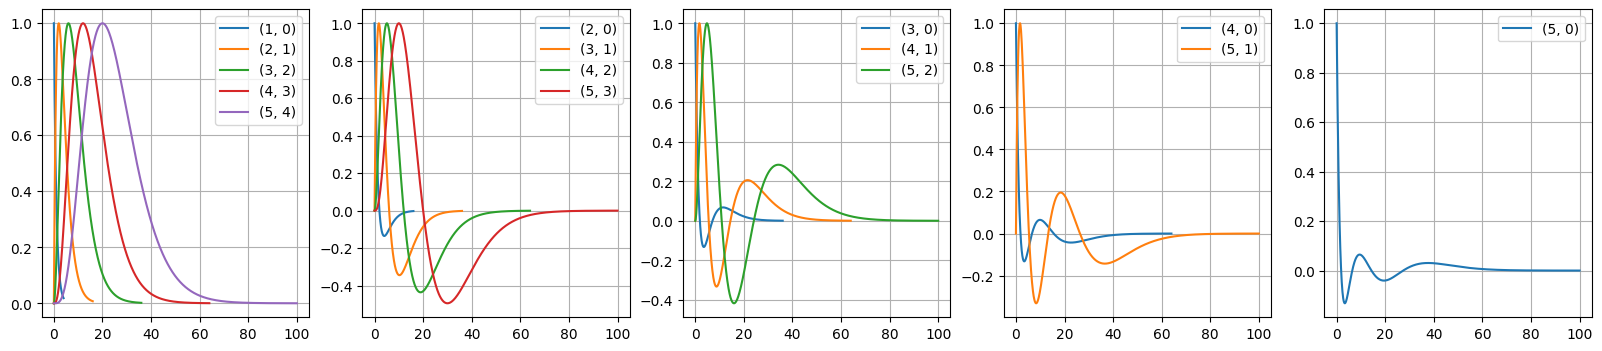

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(5*4, 4))

for diff in range(1, 5+1):
    ax = axes[diff-1]
    for n in range(1, 5+1):
        r = np.linspace(0, (2*n)**2, 1000)
        if diff > n:
            continue
        l = n - diff
        R = get_radial_part(n, l, r)
        ax.plot(r, R/max(R), label=f'({n}, {l})')
        ax.legend()
        ax.grid(True)
plt.show()

# Polar Part

## l Sorted

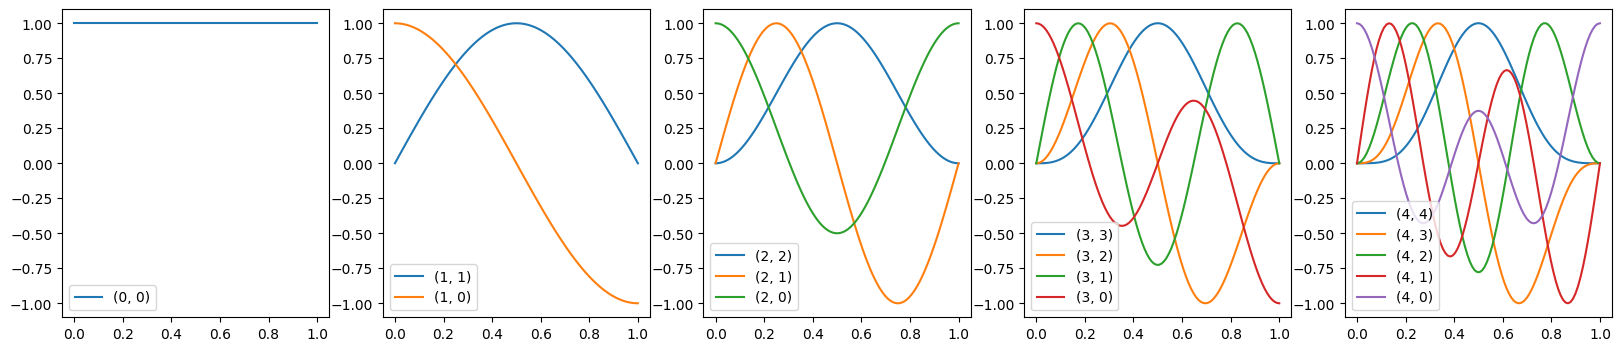

In [4]:
from scipy.special import lpmv

theta_1d = np.linspace(0, np.pi, 100)

fig, axes = plt.subplots(1, 5, figsize=(5*4, 4))

for l in range(5):
    ax = axes[l]
    for m in range(l, -1, -1):
        legendre_part = (-1)**m * lpmv(m, l, np.cos(theta_1d))
        legendre_part /= max(np.abs(legendre_part))
        ax.plot(theta_1d/np.pi, legendre_part, label=f'({l}, {m})')
    ax.legend()
    ax.set_ylim(-1.1, 1.1)
plt.show()

## Diff Sorted

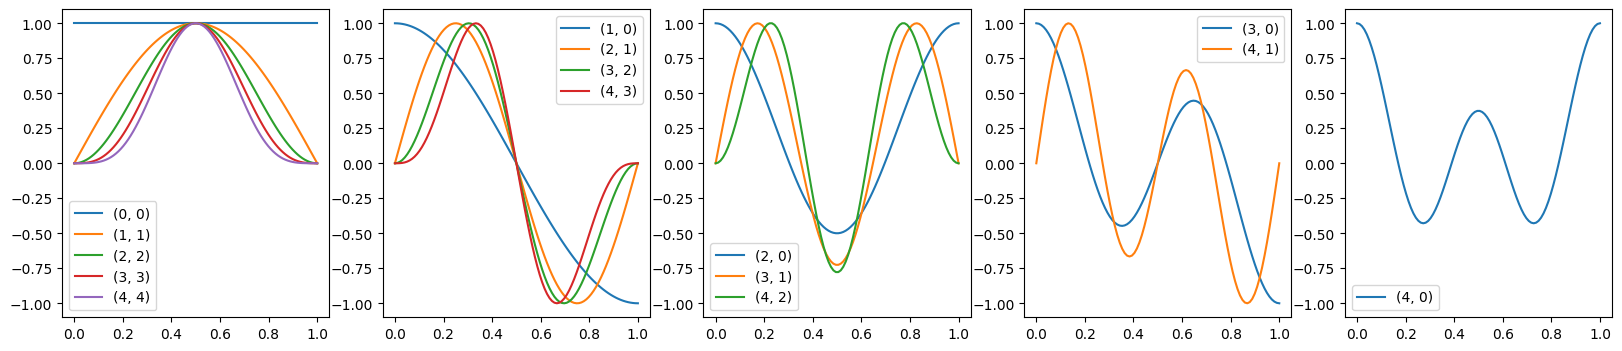

In [5]:
theta_1d = np.linspace(0, np.pi, 100)

fig, axes = plt.subplots(1, 5, figsize=(5*4, 4))

for diff in range(5):
    ax = axes[diff]
    for l in range(5):
        m = l - diff
        if m < 0:
            continue
        legendre_part = (-1)**m * lpmv(m, l, np.cos(theta_1d))
        legendre_part /= max(np.abs(legendre_part))
        ax.plot(theta_1d/np.pi, legendre_part, label=f'({l}, {m})')
    ax.legend()
    ax.set_ylim(-1.1, 1.1)
plt.show()